In [70]:
# import required libraries
import pandas as pd
import numpy as np
import plotly.graph_objects as go
import tensorflow
from tensorflow import keras
from keras import Sequential
from keras.layers import Dense, Dropout
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from skimage import io
import keras_tuner as kt

In [71]:
# load and read dataset
dataset = pd.read_csv("Churn_Modelling.xls")
dataset.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [72]:
# find shape of dataset
dataset.shape

(10000, 14)

In [73]:
# display all columns
dataset.columns

Index(['RowNumber', 'CustomerId', 'Surname', 'CreditScore', 'Geography',
       'Gender', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard',
       'IsActiveMember', 'EstimatedSalary', 'Exited'],
      dtype='object')

In [74]:
# explore rownumber column
dataset['RowNumber'].value_counts()

RowNumber
1        1
6671     1
6664     1
6665     1
6666     1
        ..
3334     1
3335     1
3336     1
3337     1
10000    1
Name: count, Length: 10000, dtype: int64

In [75]:
# remove this column
dataset = dataset.drop(['RowNumber'], axis = 1)
dataset.head()

,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [76]:
# i think i don't need customerid and surname
dataset = dataset.drop(['CustomerId', 'Surname'], axis = 1)
dataset.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [77]:
# now find data types of dataset
dataset.dtypes

CreditScore          int64
Geography           object
Gender              object
Age                  int64
Tenure               int64
Balance            float64
NumOfProducts        int64
HasCrCard            int64
IsActiveMember       int64
EstimatedSalary    float64
Exited               int64
dtype: object

In [78]:
# so there are two categorical data types: Geography and Gender
dataset['Geography'].value_counts()

Geography
France     5014
Germany    2509
Spain      2477
Name: count, dtype: int64

In [79]:
# now for gender
dataset['Gender'].value_counts()

Gender
Male      5457
Female    4543
Name: count, dtype: int64

In [80]:
# label encoder for gender as it has just two unique values
label_encoder = LabelEncoder()

dataset['Gender'] = label_encoder.fit_transform(dataset['Gender'])
dataset.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,0,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,0,41,1,83807.86,1,0,1,112542.58,0
2,502,France,0,42,8,159660.80,3,1,0,113931.57,1
3,699,France,0,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,0,43,2,125510.82,1,1,1,79084.10,0


In [81]:
# now find unique values in gender
dataset['Gender'].value_counts()

Gender
1    5457
0    4543
Name: count, dtype: int64

In [82]:
# apply label encoder for geography as well
dataset['Geography'] = label_encoder.fit_transform(dataset['Geography'])
dataset.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,0,0,42,2,0.00,1,1,1,101348.88,1
1,608,2,0,41,1,83807.86,1,0,1,112542.58,0
2,502,0,0,42,8,159660.80,3,1,0,113931.57,1
3,699,0,0,39,1,0.00,2,0,0,93826.63,0
4,850,2,0,43,2,125510.82,1,1,1,79084.10,0


In [83]:
# find which values are assigned to which countries
dataset['Geography'].value_counts()

Geography
0    5014
1    2509
2    2477
Name: count, dtype: int64

In [84]:
# now find data types of all variables in dataset
dataset.dtypes

CreditScore          int64
Geography            int32
Gender               int32
Age                  int64
Tenure               int64
Balance            float64
NumOfProducts        int64
HasCrCard            int64
IsActiveMember       int64
EstimatedSalary    float64
Exited               int64
dtype: object

In [85]:
# find description
dataset.describe()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,650.528800,0.746300,0.545700,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,96.653299,0.827529,0.497932,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,350.000000,0.000000,0.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,584.000000,0.000000,0.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,652.000000,0.000000,1.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,718.000000,1.000000,1.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,850.000000,2.000000,1.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


In [86]:
# find further info
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   CreditScore      10000 non-null  int64  
 1   Geography        10000 non-null  int32  
 2   Gender           10000 non-null  int32  
 3   Age              10000 non-null  int64  
 4   Tenure           10000 non-null  int64  
 5   Balance          10000 non-null  float64
 6   NumOfProducts    10000 non-null  int64  
 7   HasCrCard        10000 non-null  int64  
 8   IsActiveMember   10000 non-null  int64  
 9   EstimatedSalary  10000 non-null  float64
 10  Exited           10000 non-null  int64  
dtypes: float64(2), int32(2), int64(7)
memory usage: 781.4 KB


In [87]:
# target variable
dataset['Exited'].value_counts()

Exited
0    7963
1    2037
Name: count, dtype: int64

In [88]:
# target variable
vals = dataset['Exited'].value_counts().values
vals

array([7963, 2037], dtype=int64)

In [89]:
# target index
indx = dataset['Exited'].value_counts().index
indx

Index([0, 1], dtype='int64', name='Exited')

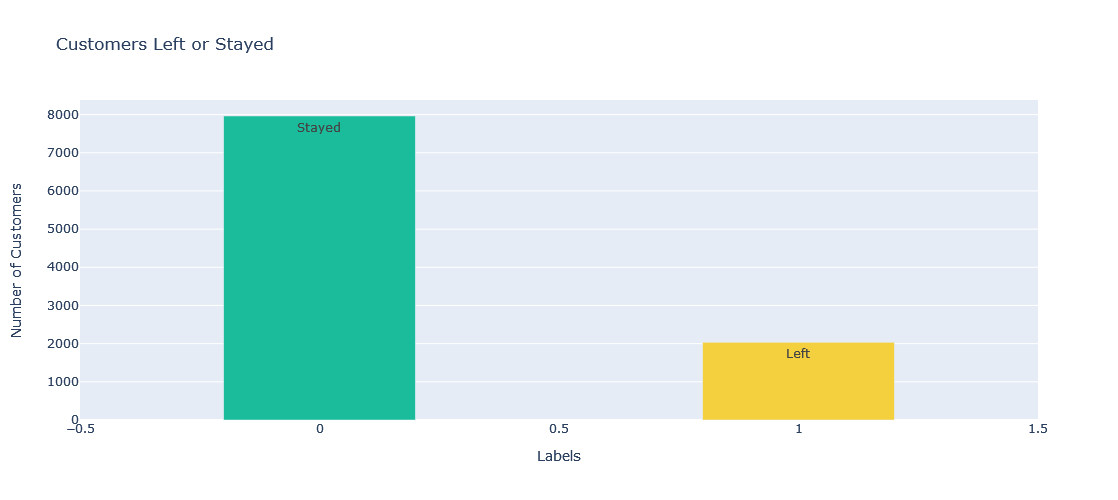

In [90]:
# find distribution of target variable
fig = go.Figure()

fig.add_trace(go.Bar(x = indx, y = vals, marker = dict(color = ['#1abc9c', '#f4d03f']), width = 0.4, text = ['Stayed', 'Left']))
fig.update_layout(title = 'Customers Left or Stayed', xaxis_title = 'Labels', yaxis_title = 'Number of Customers', height = 500)
fig.show()

# ANN Implementation

In [91]:
# separate dataset into dependent and independent
x = dataset.iloc[:, : -1]
y = dataset.iloc[:, -1]
x.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
0,619,0,0,42,2,0.00,1,1,1,101348.88
1,608,2,0,41,1,83807.86,1,0,1,112542.58
2,502,0,0,42,8,159660.80,3,1,0,113931.57
3,699,0,0,39,1,0.00,2,0,0,93826.63
4,850,2,0,43,2,125510.82,1,1,1,79084.10


In [92]:
# apply standrad scaler to scale values
scaler = StandardScaler()

x = scaler.fit_transform(x)

In [93]:
# now split dataset into training and testing
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.1, random_state = 0)

In [94]:
# prepare ann model
model = Sequential()

# input layer
model.add(Dense(units = 10, input_dim = 10, input_shape = (10, ), kernel_initializer = 'uniform'))

# first hidden layer
model.add(Dense(units = 128, activation = 'relu', kernel_initializer = 'uniform'))

# second hidden layer
model.add(Dense(units = 128, activation = 'tanh', kernel_initializer = 'uniform'))

# third hidden layer
model.add(Dense(units = 128, activation = 'relu', kernel_initializer = 'uniform'))

# output layer
model.add(Dense(units = 1, activation = 'sigmoid', kernel_initializer = 'uniform'))

model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_7 (Dense)             (None, 10)                110       
                                                                 
 dense_8 (Dense)             (None, 128)               1408      
                                                                 
 dense_9 (Dense)             (None, 128)               16512     
                                                                 
 dense_10 (Dense)            (None, 128)               16512     
                                                                 
 dense_11 (Dense)            (None, 1)                 129       
                                                                 
Total params: 34671 (135.43 KB)
Trainable params: 34671 (135.43 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [95]:
# compile model
model.compile(optimizer = 'adam', loss = 'BinaryCrossentropy', metrics = ['accuracy'])

In [96]:
# fit model using data
model.fit(x_train, y_train, epochs = 5, batch_size = 20, validation_data = (x_test, y_test))

Epoch 1/5
450/450 [==============================] - 5s 4ms/step - loss: 0.4452 - accuracy: 0.8118 - val_loss: 0.4004 - val_accuracy: 0.8410
Epoch 2/5
450/450 [==============================] - 2s 4ms/step - loss: 0.3861 - accuracy: 0.8434 - val_loss: 0.3442 - val_accuracy: 0.8630
Epoch 3/5
450/450 [==============================] - 2s 4ms/step - loss: 0.3608 - accuracy: 0.8523 - val_loss: 0.3557 - val_accuracy: 0.8520
Epoch 4/5
450/450 [==============================] - 2s 4ms/step - loss: 0.3547 - accuracy: 0.8550 - val_loss: 0.3409 - val_accuracy: 0.8600
Epoch 5/5
450/450 [==============================] - 2s 3ms/step - loss: 0.3522 - accuracy: 0.8557 - val_loss: 0.3452 - val_accuracy: 0.8520


In [97]:
# evaluate on test dataset
model.evaluate(x_test, y_test)

32/32 [==============================] - 0s 3ms/step - loss: 0.3452 - accuracy: 0.8520


[0.3452163338661194, 0.8519999980926514]

In [98]:
# evaluate on training data
model.evaluate(x_train, y_train)

282/282 [==============================] - 1s 3ms/step - loss: 0.3468 - accuracy: 0.8568


[0.3468051850795746, 0.8567777872085571]

In [99]:
# predict unseen dataset
y_pred = model.predict(x_test)
y_pred

32/32 [==============================] - 0s 3ms/step


array([[0.15828541],
       [0.35662887],
       [0.24761574],
       [0.11660898],
       [0.0684284 ],
       [0.8162768 ],
       [0.03056171],
       [0.059254  ],
       [0.14660206],
       [0.9078263 ],
       [0.03640617],
       [0.17980753],
       [0.21540892],
       [0.11539573],
       [0.38210505],
       [0.2919024 ],
       [0.12570892],
       [0.08471386],
       [0.10294744],
       [0.09526212],
       [0.28017348],
       [0.01325277],
       [0.04160509],
       [0.17518683],
       [0.01205712],
       [0.26109067],
       [0.10529781],
       [0.04486895],
       [0.19012864],
       [0.43460917],
       [0.02766124],
       [0.34483403],
       [0.07097925],
       [0.03833386],
       [0.26256981],
       [0.01494569],
       [0.02543387],
       [0.02057583],
       [0.02087573],
       [0.16385733],
       [0.1354784 ],
       [0.3329814 ],
       [0.40095666],
       [0.03741061],
       [0.30050838],
       [0.07681984],
       [0.33465636],
       [0.163

In [100]:
# find shape of y_pred
y_pred.shape

(1000, 1)

In [101]:
# reshpe y_pred to one dimension
y_pred = y_pred.flatten()
y_pred.shape

(1000,)

In [102]:
y_pred

array([0.15828541, 0.35662887, 0.24761574, 0.11660898, 0.0684284 ,
       0.8162768 , 0.03056171, 0.059254  , 0.14660206, 0.9078263 ,
       0.03640617, 0.17980753, 0.21540892, 0.11539573, 0.38210505,
       0.2919024 , 0.12570892, 0.08471386, 0.10294744, 0.09526212,
       0.28017348, 0.01325277, 0.04160509, 0.17518683, 0.01205712,
       0.26109067, 0.10529781, 0.04486895, 0.19012864, 0.43460917,
       0.02766124, 0.34483403, 0.07097925, 0.03833386, 0.26256981,
       0.01494569, 0.02543387, 0.02057583, 0.02087573, 0.16385733,
       0.1354784 , 0.3329814 , 0.40095666, 0.03741061, 0.30050838,
       0.07681984, 0.33465636, 0.16398889, 0.59906393, 0.00590888,
       0.99841666, 0.07561727, 0.1566709 , 0.1433209 , 0.06958284,
       0.04131566, 0.23635422, 0.22763406, 0.5244559 , 0.39674458,
       0.06305628, 0.12408422, 0.01631795, 0.19785306, 0.3830401 ,
       0.884072  , 0.06450049, 0.36246562, 0.04977427, 0.79072744,
       0.8122727 , 0.02172204, 0.00705693, 0.87279177, 0.41783

In [103]:
y_test.shape

(1000,)

In [104]:
y_test

9394    0
898     1
2398    0
5906    0
2343    0
       ..
9319    0
2662    1
6925    0
8070    0
3651    0
Name: Exited, Length: 1000, dtype: int64

In [105]:
# dtype of y_pred
y_pred.dtype

dtype('float32')

In [106]:
# y_test dtype
y_test.dtype

dtype('int64')

In [107]:
# type of y_pred
type(y_pred)

numpy.ndarray

In [108]:
# type of y_test
type(y_test)

pandas.core.series.Series

In [109]:
# as y-pred is float we i need to make a range and then split each value into 0 or 1
y_predd = []
for i in y_pred:
    if (i < 0.5):
        y_predd.append(0)
    else:
        y_predd.append(1)
y_predd       

[0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 1,
 1,
 0,
 0,
 1,
 0,
 0,
 1,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 1,
 0,
 1,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,


In [110]:

y_pred = np.array(y_predd)
y_pred

array([0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0,
       1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

In [111]:
y_test

9394    0
898     1
2398    0
5906    0
2343    0
       ..
9319    0
2662    1
6925    0
8070    0
3651    0
Name: Exited, Length: 1000, dtype: int64

In [112]:
accuracy_score(y_pred, y_test)

0.852

# Hyperparameter Tuning

In [117]:
# define function
def tuning(hp):

    # define model
    model1 = Sequential()

    # input layer
    model1.add(Dense(units = 10, input_dim = 10, input_shape = (10, ), kernel_initializer = 'uniform'))

    # declare units
    units = hp.Int('units', min_value = 10, max_value = 128, step = 8)

    # declare optimizers
    optimizer = hp.Choice('optimizer', values = ['adam', 'adadelta', 'rmsprop', 'sgd'])

    # declare activation functions
    activation = hp.Choice('activation', values = ['relu', 'tanh', 'sigmoid', 'softmax'])

    # for loop for layers
    for i in range(hp.Int('num_layers', min_value = 1, max_value = 10)):
        model1.add(Dense(units = units, activation = activation, kernel_initializer = 'uniform'))

    # ouput layer
    model1.add(Dense(units = 1, activation = 'sigmoid', kernel_initializer = 'uniform'))

    # compile model
    model1.compile(optimizer = optimizer, loss = 'BinaryCrossentropy', metrics = ['accuracy'])

    return model1

In [118]:
tuner1 = kt.RandomSearch(tuning, objective = 'val_accuracy', max_trials = 2800, directory = 'tuning')

In [119]:
tuner1.search(x_train, y_train, epochs = 5, validation_data = (x_test, y_test))

Trial 2050 Complete [00h 00m 06s]
val_accuracy: 0.7940000295639038

Best val_accuracy So Far: 0.871999979019165
Total elapsed time: 04h 59m 24s


In [120]:
# find best parametersac
tuner1.get_best_hyperparameters()[0].values

{'units': 106, 'optimizer': 'adam', 'activation': 'relu', 'num_layers': 6}

In [121]:
# find best parametersac
tuner1.get_best_hyperparameters()[0].values

{'units': 106, 'optimizer': 'adam', 'activation': 'relu', 'num_layers': 6}

In [122]:
for i in range(10, 128, 8):
    print(i)

10
18
26
34
42
50
58
66
74
82
90
98
106
114
122
